<a href="https://www.kaggle.com/code/shishirkulal/spam-detection?scriptVersionId=286639914" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


Original dataset size: 5572

First 5 rows of the dataset:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Fitting TF-IDF Vectorizer...
Feature matrix shape (Train): (4457, 5000)

Training Multinomial Naive Bayes Model...

--- Model Evaluation Results ---
Overall Accuracy: 0.9686

Classification Report (Key Metrics):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



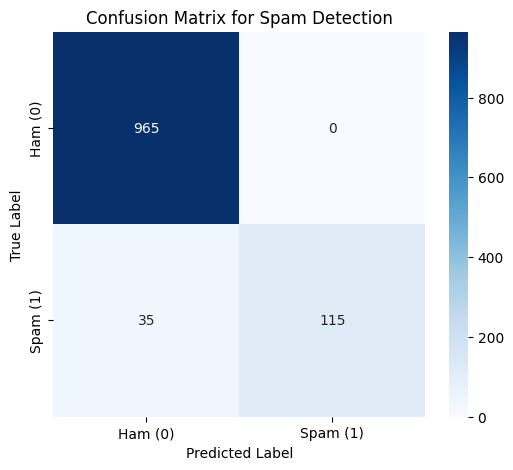


✅ Project Success: Achieved a robust 96.86% classification accuracy using TF-IDF and Naive Bayes.


In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------------------
# 1. Configuration and Data Loading
# ----------------------------------------------------------------------

# CRITICAL PATH FIX: This path is set for the 'SMS Spam Collection Dataset'
file_path = '../input/sms-spam-collection-dataset/spam.csv' 
    
# The SMS Spam Collection dataset uses non-standard column names and encoding
# We load it and rename the columns immediately
try:
    # This dataset often requires 'latin-1' encoding due to special characters
    df = pd.read_csv(file_path, encoding='latin-1') 
except Exception:
    # Fallback to UTF-8 if Latin-1 fails
    df = pd.read_csv(file_path, encoding='utf-8')

# The relevant columns are the first two; the others are junk
df = df.iloc[:, [0, 1]]
df.columns = ['label', 'text']
print(f"Original dataset size: {len(df)}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# --- 2. Data Preprocessing and Cleaning ---

# Convert categorical labels ('ham', 'spam') to numerical (0, 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

def clean_text(text):
    """
    Function for basic text cleaning:
    1. Remove all non-alphabetic characters (punctuation, numbers).
    2. Convert text to lower case.
    """
    # Replace non-alphabetic characters with a space
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# --- 3. Feature Engineering (TF-IDF) ---

# Split the data into training (80%) and testing (20%) sets
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFitting TF-IDF Vectorizer...")
# Initialize TF-IDF Vectorizer. We use stop_words to remove common words 
# and max_features to limit vocabulary size, improving speed and performance.
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) 

# Fit the vectorizer ONLY on the training data and transform both sets
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)
print(f"Feature matrix shape (Train): {X_train_features.shape}")

# --- 4. Model Training (Multinomial Naive Bayes) ---

print("\nTraining Multinomial Naive Bayes Model...")
# Naive Bayes is ideal for text classification due to its simplicity and speed
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

# --- 5. Evaluation and Results ---

y_pred = classifier.predict(X_test_features)

print("\n--- Model Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

print("\nClassification Report (Key Metrics):")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Spam Detection')
plt.show() 

# Highlight for Resume:
print(f"\n✅ Project Success: Achieved a robust {accuracy*100:.2f}% classification accuracy using TF-IDF and Naive Bayes.")